In [70]:
from collections import Counter
from vectors import distance
import random 
import matplotlib.pyplot as plt
import itertools
from statistic import mean

## K - nearest neighbors 

In [10]:
def raw_majority_vote(labels):
    votes = Counter(labels)
    winner,_ = votes.most_common(1)[0]
    return winner


def majority_vote(labels):
    votes = Counter(labels)
    winner,winner_count = votes.most_common(1)[0]
    num_winners = len([count for count in votes.values() if count == winner_count])

    if num_winners == 1:
        return winner
    else: 
        return majority_vote(labels[:-1])


In [11]:
labels = ['L','10','10','L','12']
print(raw_majority_vote(labels))
print(majority_vote(labels))

L
10


In [29]:
def knn_classify(k, labeled_points,new_point):
    by_distance = sorted(labeled_points,key= lambda tup: distance(tup[0],new_point) )

    k_nearest_labels = [label for _,label in by_distance[:k]]

    return majority_vote(k_nearest_labels)

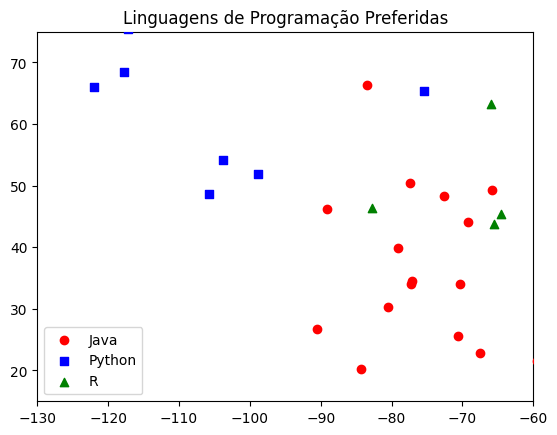

In [39]:
def generate_random_data():
    case = random.randint(1,3)
    delta_x = random.random()*50
    delta_y = random.random()*50
    if case == 1:
        return ([-122.3 + delta_x, 47.53 + delta_y], "Python")
    elif case == 2:
        return ([-100 + delta_x, 20+ delta_y], "Java")
    else:
        return ([-89.33 + delta_x, 43.13 + delta_y], "R")

cities = [generate_random_data() for _ in range(50)]

plots = { "Java" : ([], []), "Python" : ([], []), "R" : ([], []) }
markers = { "Java" : "o", "Python" : "s", "R" : "^" }
colors = { "Java" : "r", "Python" : "b", "R" : "g" }

for (longitude, latitude), language in cities:
    plots[language][0].append(longitude)
    plots[language][1].append(latitude)

# cria uma série de dispersão para cada linguagem
for language, (x, y) in plots.items():
    plt.scatter(x, y, color=colors[language], marker=markers[language],
    label=language, zorder=10)

plt.legend(loc=0)
plt.axis([-130,-60,15,75]) # ajusta os eixos
plt.title("Linguagens de Programação Preferidas")
plt.show()

In [40]:
for k in [1,3,5,7,9,11]:
    num_correct = 0

    for city in cities:
        location, actual_language = city
        other_cities = [other_city for other_city in cities if other_city != city]

        predicted_language = knn_classify(k,other_cities,location)

        if predicted_language == actual_language:
            num_correct += 1

    print(k, "neighbor[s]:", num_correct, "correct out of", len(cities))

1 neighbor[s]: 40 correct out of 50
3 neighbor[s]: 38 correct out of 50
5 neighbor[s]: 39 correct out of 50
7 neighbor[s]: 39 correct out of 50
9 neighbor[s]: 38 correct out of 50
11 neighbor[s]: 40 correct out of 50


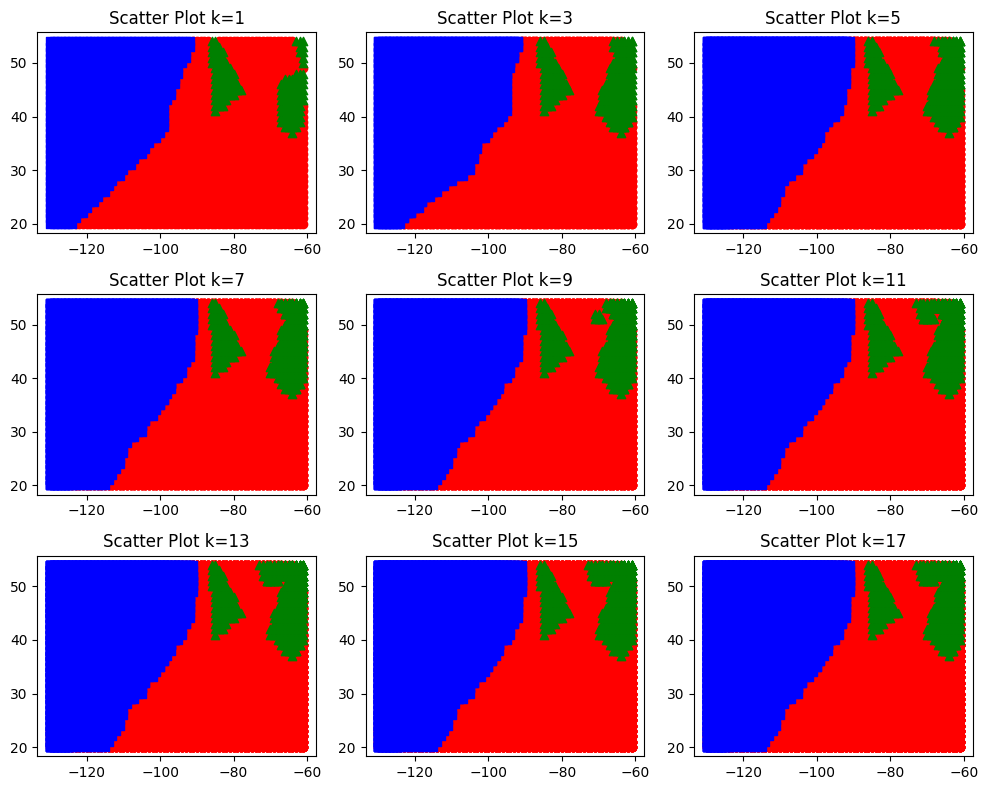

In [68]:
plots = { "Java" : ([], []), "Python" : ([], []), "R" : ([], []) }

ki = [1,3,5,7,9,11,13,15,17]
pos_x = [0,1,2]
pos_y = [0,1,2]
coords = list(itertools.product(pos_x,pos_y))

fig, axes = plt.subplots(len(pos_x), len(pos_y), figsize=(10, 8))

for k,coord in zip(ki,coords):

    for longitude in range(-130, -60):
        for latitude in range(20, 55):
            predicted_language = knn_classify(k, cities, [longitude, latitude])
            plots[predicted_language][0].append(longitude)
            plots[predicted_language][1].append(latitude)

    for language, (x, y) in plots.items():
        axes[coord[0], coord[1]].scatter(x, y, color=colors[language], marker=markers[language],
        label=language, zorder=10)
        axes[coord[0], coord[1]].set_title(f"Scatter Plot k={k}")

plt.tight_layout()
plt.show()

In [69]:
def random_point(dim):
    return [random.random() for _ in range(dim)]

def random_distances(dim, num_pairs):
    return [distance(random_point(dim), random_point(dim)) for _ in range(num_pairs)]

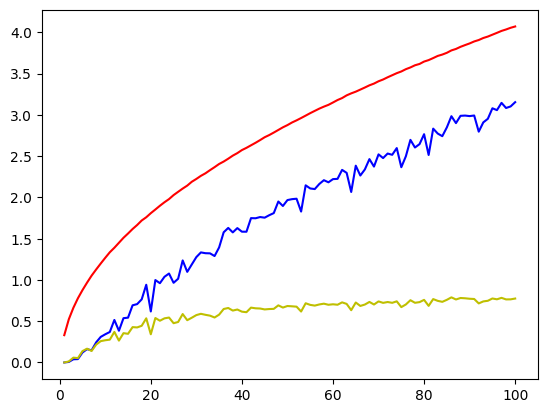

In [75]:
dimensions = range(1, 101)

avg_distances = []
min_distances = []

random.seed(0)

for dim in dimensions:
    distances = random_distances(dim, 10000) # 10.000 pares aleatórios
    avg_distances.append(mean(distances)) # rastreia a média
    min_distances.append(min(distances)) # rastreia o mínimo


xs = [x for x in dimensions]

min_avg_ration = [min/avg for (min,avg) in zip(min_distances,avg_distances)]

plt.plot(xs, avg_distances, 'r')
plt.plot(xs, min_distances, 'b')
plt.plot(xs, min_avg_ration, 'y')

plt.show()

## Maldição da dimensionalidade: 

Conforme as dimensões aumentam mais distante os pontos ficam, até o caso de o ponto mais próximo estár mais longe que a média. O que torna o algoritmo de Knn inútil. 

Para combater isso pode ser necessario aplicar uma redução de dimensionalidade antes da aplicação do algoritmo. 